In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/dataflow2025-product-recommendation/data.csv', skipinitialspace=True)


<ipython-input-2-cf39f9cb0c70>:1: DtypeWarning: Columns (11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/dataflow2025-product-recommendation/data.csv', skipinitialspace=True)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    float64
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             float64
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [4]:
print(df.isnull().sum()/len(df)*100)

fecha_dato                0.000000
ncodpers                  0.000000
ind_empleado              0.203220
pais_residencia           0.203220
sexo                      0.203732
age                       0.203220
fecha_alta                0.203220
ind_nuevo                 0.203220
antiguedad                0.203220
indrel                    0.203220
ult_fec_cli_1t           99.818330
indrel_1mes               1.097513
tiprel_1mes               1.097513
indresi                   0.203220
indext                    0.203220
conyuemp                 99.986752
canal_entrada             1.363829
indfall                   0.203220
tipodom                   0.203227
cod_prov                  0.685784
nomprov                   0.685784
ind_actividad_cliente     0.203220
renta                    20.475648
segmento                  1.387585
ind_ahor_fin_ult1         0.000000
ind_aval_fin_ult1         0.000000
ind_cco_fin_ult1          0.000000
ind_cder_fin_ult1         0.000000
ind_cno_fin_ult1    

Nhận xét: 
Tỉ lệ thiếu rất cao
- Cột 'ult/-fec_cli_1t' có tỉ lệ trông là 99,81% điều này thể hiện rằng phần lớn  khách hàng không rời bỏ, vẫn duy trì trạng thái là khách hàng chính cho đến cuối tháng. Do không xét bài toán churn nên ta sẽ xóa cột này
- Cột "conyuemp" có tỉ lệ trống rất cao là 99,98%; điều này cho thế rằng hầu hết khách hàng không phải là vợ chồng với nhân viên => thay các giá trị trống bằng 0
  
Tỉ lệ thiếu trung bình:
- 'renta': 20,47% : thể hiện tổng thu nhập của gia đình => xử lý bằng cách thay bằng giá trị trung vị theo nhóm tỉnh thành tương ứng (nomprov)

Tỉ lệ thiếu thấp
- indrel_1mes: 1,09%: Thay bằng giá trị phổ biến nhất 
- tiprel_1mes: 1,09%; Thay bằng giá trị phổ biến nhất
- indresi: 0,2%: Thay bằng giá trị phổ biến nhất
- indext: 0,2%: Thay bằng giá trị phổ biến nhất
- canal_entrada: 1,36%: Thay bằng giá trị phổ biến nhất
- cod_prov: 0,69%: Thay bằng giá trị phổ biến nhất
- nomprov: 0,69%: Thay bằng giá trị phổ biến nhất
- indfall: 0,2%: Thay bằng giá trị phổ biến nhất
- segmento: 1,39%: Thay bằng giá trị phổ biến nhất
- ind_empleado: 0,2%: Thay bằng giá trị phổ biến nhất
- pais_residencia: 0,2%: Thay bằng giá trị phổ biến nhất
- sexo: 0,2%: Thay bằng giá trị phổ biến nhất
- age: 0,2%: Thay bằng giá trị trung bình
- fecha_alta: 0,2%: Thay bằng giá trị phổ biến nhất
- antiguedad: 0,2%: Thay bằng giá trị trung bình
- ind_nuevo: 0,2%: Thay bằng giá trị phổ biến nhất
- indrel: 0,2%: Thay bằng giá trị phổ biến nhất
- ind_nomina_ult1: 0,11%: Thay bằng giá trị phổ biến nhất
-ind_nom_pens_ult1: 0,11%: Thay bằng giá trị phổ biến nhất

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


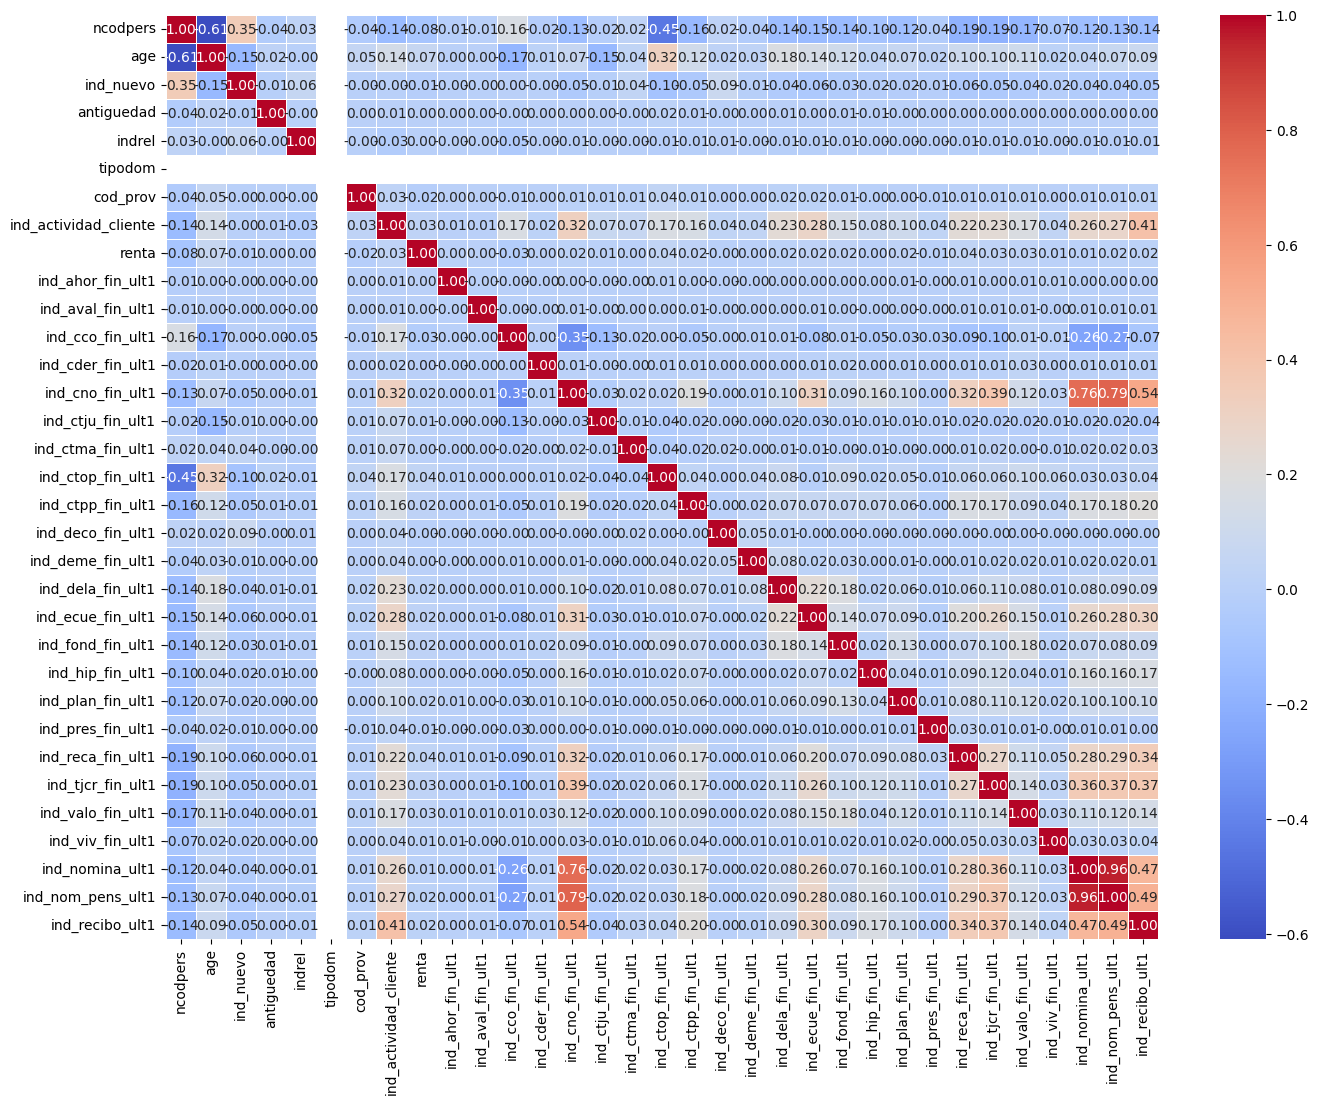

In [5]:
# 1. Lọc ra các cột numeric
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# 2. Tính toán ma trận tương quan
corr_matrix = df_numeric.corr()

# 3. Vẽ heatmap
plt.figure(figsize=(16, 12))  # Tùy chỉnh kích thước theo nhu cầu
sns.heatmap(corr_matrix, 
            annot=True,      # Hiển thị giá trị hệ số tương quan
            fmt=".2f",       # Định dạng 2 chữ số thập phân
            cmap='coolwarm', # Bảng màu
            linewidths=0.5)  # Độ dày đường viền giữa các ô

# plt.title('Ma trận tương quan giữa các thuộc tính numeric')
plt.show()

In [6]:
df['conyuemp'].fillna(0, inplace=True)


<ipython-input-6-5506ea6cd443>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['conyuemp'].fillna(0, inplace=True)


In [7]:
from scipy.stats import mode

# Thay giá trị NaN trong 'nomprov' bằng mode (giá trị xuất hiện nhiều nhất)
mode_nomprov = df['nomprov'].mode()[0]
df['nomprov'].fillna(mode_nomprov, inplace=True)

# Tính trung vị thu nhập theo tỉnh
median_by_province = df.groupby('nomprov')['renta'].median()

# Thay NaN trong 'renta' bằng trung vị của tỉnh tương ứng
df['renta'] = df['renta'].fillna(df['nomprov'].map(median_by_province))

# Nếu vẫn còn NaN, thay bằng trung vị của toàn bộ cột 'renta'
df['renta'].fillna(df['renta'].median(), inplace=True)


<ipython-input-7-a02ff8ab332a>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['nomprov'].fillna(mode_nomprov, inplace=True)
<ipython-input-7-a02ff8ab332a>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [8]:
from scipy.stats import mode

# Danh sách các cột cần thay bằng mode (giá trị phổ biến nhất)
columns_mode = [
    "indrel_1mes", "tiprel_1mes", "indresi", "indext", "canal_entrada", "cod_prov",
    "indfall", "segmento", "ind_empleado", "pais_residencia", "sexo", "fecha_alta",
    "ind_nuevo", "indrel", "ind_nomina_ult1", "ind_nom_pens_ult1","tipodom", "ind_actividad_cliente"
]

for col in columns_mode:
    most_frequent = df[col].mode()[0]  # Lấy giá trị phổ biến nhất
    df[col].fillna(most_frequent, inplace=True)

# Các cột thay bằng giá trị trung bình
columns_median = ["age", "antiguedad"]
for col in columns_median:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)


<ipython-input-8-a896fbbda79f>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)
<ipython-input-8-a896fbbda79f>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [9]:
print(df.isnull().sum()/len(df)*100)

fecha_dato                0.00000
ncodpers                  0.00000
ind_empleado              0.00000
pais_residencia           0.00000
sexo                      0.00000
age                       0.00000
fecha_alta                0.00000
ind_nuevo                 0.00000
antiguedad                0.00000
indrel                    0.00000
ult_fec_cli_1t           99.81833
indrel_1mes               0.00000
tiprel_1mes               0.00000
indresi                   0.00000
indext                    0.00000
conyuemp                  0.00000
canal_entrada             0.00000
indfall                   0.00000
tipodom                   0.00000
cod_prov                  0.00000
nomprov                   0.00000
ind_actividad_cliente     0.00000
renta                     0.00000
segmento                  0.00000
ind_ahor_fin_ult1         0.00000
ind_aval_fin_ult1         0.00000
ind_cco_fin_ult1          0.00000
ind_cder_fin_ult1         0.00000
ind_cno_fin_ult1          0.00000
ind_ctju_fin_u

In [10]:
# Đếm số lượng giá trị "N" và "S"
counts = df['indfall'].value_counts()

# Tính phần trăm
percentages = (counts / counts.sum()) * 100

# Hiển thị kết quả
print(percentages)

indfall
N    99.745283
S     0.254717
Name: count, dtype: float64


In [11]:
counts = df['pais_residencia'].value_counts()
# Tính phần trăm
percentages = (counts / counts.sum()) * 100

# Hiển thị kết quả
print(percentages)

pais_residencia
ES    99.517377
FR     0.037817
AR     0.035428
DE     0.033889
GB     0.033743
        ...    
ZW     0.000081
DJ     0.000081
JM     0.000081
BM     0.000044
MT     0.000015
Name: count, Length: 118, dtype: float64


**BỎ NHỮNG CỘT KHÔNG CẦN THIẾT**
1. Mã khách hàng: ncodpers: Do ở đây chủ yếu phân tích về nhu cầu
của KH, sản phẩm, làm sao để tăng doanh thu/lợi nhuận.
=> Mã KH là không cần thiết, chỉ dùng để nhận diện, không dự đoán

2. fecha_dato: chỉ dùng để phân vùng dữ liệu, không ảnh hưởng trực 
tiếp đến dự đoán sản phẩm tiếp theo

3. ind_empleado: không có mói quan hệ rõ ràng giữa trạng thái nghề 
nghiệp với hành vi mua sắm của KH hay dự đoán SP tiếp theo

4. conyuemp: do tỉ lệ KH không phải là vợ/chồng với nhân viên trong
ngân hàng là rất cao 99,98% => có thể lược bỏ cột này vì nó không
ảnh hưởng đến hành vi sử dụng SP của KH

5. ult_fec_cli_1t:99,81% là khách hàng không rời bỏ, vẫn duy trì là khách hàng chính cho đến cuối tháng.

6.  tipodom: chủ yếu đến 99,98% là giá trị 1 thể hiện địa chỉ chính 
=> có thể bỏ do khách hàng đều để địa chỉ chính 

7. indfall: Có thể bỏ do 99,97% khách hàng vẫn còn sống, chỉ có 0.25% khách hàng 
đã mất

8. pairs_residencia: do có 99,51% là KH sống ở ES; còn lại tỉ lệ rất nhỏ nằm ở các 
nước khác nhau => có thể bỏ

In [12]:
import gc

# Danh sách các cột cần xóa
cols_to_drop = [
    'ult_fec_cli_1t', 'ncodpers', 'fecha_dato', 'ind_empleado', 
    'conyuemp', 'tipodom', 'indfall', 'pais_residencia'
]

# Xóa cột và ép Pandas xử lý bộ nhớ
df.drop(columns=cols_to_drop, inplace=True)

# Giải phóng bộ nhớ không sử dụng
gc.collect()

73621

In [13]:
df.head()

,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,indrel_1mes,tiprel_1mes,indresi,indext,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,H,35.0,2015-01-12,0.0,6.0,1.0,1.0,A,S,N,...,0,0,0,0,0,0,0,0.0,0.0,0
1,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,S,...,0,0,0,0,0,0,0,0.0,0.0,0
2,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,N,...,0,0,0,0,0,0,0,0.0,0.0,0
3,H,22.0,2012-08-10,0.0,35.0,1.0,1.0,I,S,N,...,0,0,0,0,0,0,0,0.0,0.0,0
4,V,23.0,2012-08-10,0.0,35.0,1.0,1.0,A,S,N,...,0,0,0,0,0,0,0,0.0,0.0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 40 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   sexo                   object 
 1   age                    float64
 2   fecha_alta             object 
 3   ind_nuevo              float64
 4   antiguedad             float64
 5   indrel                 float64
 6   indrel_1mes            object 
 7   tiprel_1mes            object 
 8   indresi                object 
 9   indext                 object 
 10  canal_entrada          object 
 11  cod_prov               float64
 12  nomprov                object 
 13  ind_actividad_cliente  float64
 14  renta                  float64
 15  segmento               object 
 16  ind_ahor_fin_ult1      int64  
 17  ind_aval_fin_ult1      int64  
 18  ind_cco_fin_ult1       int64  
 19  ind_cder_fin_ult1      int64  
 20  ind_cno_fin_ult1       int64  
 21  ind_ctju_fin_ult1      int64  
 22  ind_ctma_fin_ult

**XỬ LÝ OUTLINER**

**Age**
1. Xem tuổi có nằm ngoài độ tuổi từ 0 - 100 không? => Có thì loại bỏ
2. Phân loại độ tuổi

In [15]:
# Lọc dữ liệu hợp lệ (tuổi từ 0-100)
df = df[(df['age'] >= 0) & (df['age'] <= 100)]

# Phân loại độ tuổi
bins = [0, 18, 35, 50, 100]
labels = ['Young', 'Adult', 'Middle-Aged', 'Senior']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Tính phần trăm mỗi nhóm tuổi
percentages = df['age_group'].value_counts(normalize=True) * 100

# Hiển thị kết quả
print(percentages)

age_group
Adult          43.795719
Middle-Aged    30.466576
Senior         24.785814
Young           0.951891
Name: proportion, dtype: float64


Có thể thấy độ tuổi từ 18-35 sử dụng dịch vụ nhiều nhất ( 43,79%); tiếp đến là độ tuổi từ 35-50 (30,47%). 
Độ tuổi từ 0-18 chiếm tỉ lệ ít nhất. 

**ind_nuevo**: chỉ số khách hàng mới. Ta xem xem lượng KH mới trong 6 tháng qua là bao nhiêu %

In [16]:
counts = df['ind_nuevo'].value_counts()

# Tính phần trăm
percentages = (counts / counts.sum()) * 100

# Hiển thị kết quả
print(percentages)


ind_nuevo
0.0    94.050471
1.0     5.949529
Name: count, dtype: float64


Chỉ có khoảng 6% là KH đăng kí trong 6 tháng qua, còn lại đều là KH cũ. 

**Thâm niên của KH: antiguedad**
'New': Khách hàng có thâm niên từ 0 đến 12 tháng.
'Medium': Khách hàng có thâm niên từ 13 đến 24 tháng.
'Old': Khách hàng có thâm niên từ 25 đến 60 tháng.
'Veteran': Khách hàng có thâm niên trên 60 tháng.


In [17]:
# Kiểm tra tất cả các giá trị trong cột 'antiguedad'
# unique_values = df['antiguedad'].unique()

# Hiển thị kết quả
# print(unique_values)

# Đếm tần suất lặp lại của từng giá trị trong cột 'antiguedad'
value_counts = df['antiguedad'].value_counts()

# Hiển thị kết quả
print(value_counts)

# Phân loại thâm niên
df['seniority_group'] = pd.cut(df['antiguedad'], 
                               bins=[0, 12, 24, 60, np.inf], 
                               labels=['New', 'Medium', 'Old', 'Veteran'], 
                               right=True)

# Đếm số lượng khách hàng trong từng nhóm thâm niên
print('Số lượng từng nhóm:')
print(df['seniority_group'].value_counts())

antiguedad
 12.0        243159
 21.0        214788
 10.0        206162
 9.0         177954
 23.0        177832
              ...  
 253.0          416
 254.0          261
 255.0          179
 256.0          102
-999999.0        38
Name: count, Length: 258, dtype: int64
Số lượng từng nhóm:
seniority_group
Veteran    6234335
Old        3702629
New        1826737
Medium     1736222
Name: count, dtype: int64


In [18]:
counts = df['indrel'].value_counts()
# Tính phần trăm
percentages = (counts / counts.sum()) * 100

# Hiển thị kết quả
print(percentages)

indrel
1.0     99.818416
99.0     0.181584
Name: count, dtype: float64


In [19]:
counts = df['cod_prov'].value_counts()
# Tính phần trăm
percentages = (counts / counts.sum()) * 100

# Hiển thị kết quả
print(percentages)

cod_prov
28.0    32.981362
8.0      9.344990
46.0     5.000389
41.0     4.436383
15.0     3.147214
30.0     2.909353
29.0     2.690474
50.0     2.509029
3.0      2.297498
11.0     2.159553
36.0     2.053293
33.0     1.947421
47.0     1.745330
35.0     1.727368
6.0      1.415137
48.0     1.361017
45.0     1.342490
18.0     1.308965
37.0     1.203555
39.0     1.140164
14.0     1.060066
10.0     0.952412
7.0      0.915916
21.0     0.896582
13.0     0.874990
2.0      0.836602
12.0     0.764689
43.0     0.733877
9.0      0.712262
17.0     0.663672
31.0     0.649209
26.0     0.623832
27.0     0.623018
32.0     0.615618
24.0     0.608459
25.0     0.579195
20.0     0.524143
38.0     0.520256
19.0     0.473646
23.0     0.471783
4.0      0.441991
16.0     0.420003
49.0     0.373275
34.0     0.361416
40.0     0.310464
22.0     0.294248
5.0      0.284214
1.0      0.276330
44.0     0.165207
42.0     0.129320
52.0     0.069383
51.0     0.052939
Name: count, dtype: float64


**Renta: Thu nhập trước thuế**

In [20]:
# Lấy tất cả giá trị duy nhất trong cột 'renta'
unique_values = df['renta'].unique()

# Kiểm tra xem có giá trị âm trong các giá trị duy nhất không
negative_values = unique_values[unique_values < 0]

# Hiển thị kết quả
print("Các giá trị âm trong cột 'renta':", negative_values)


Các giá trị âm trong cột 'renta': []


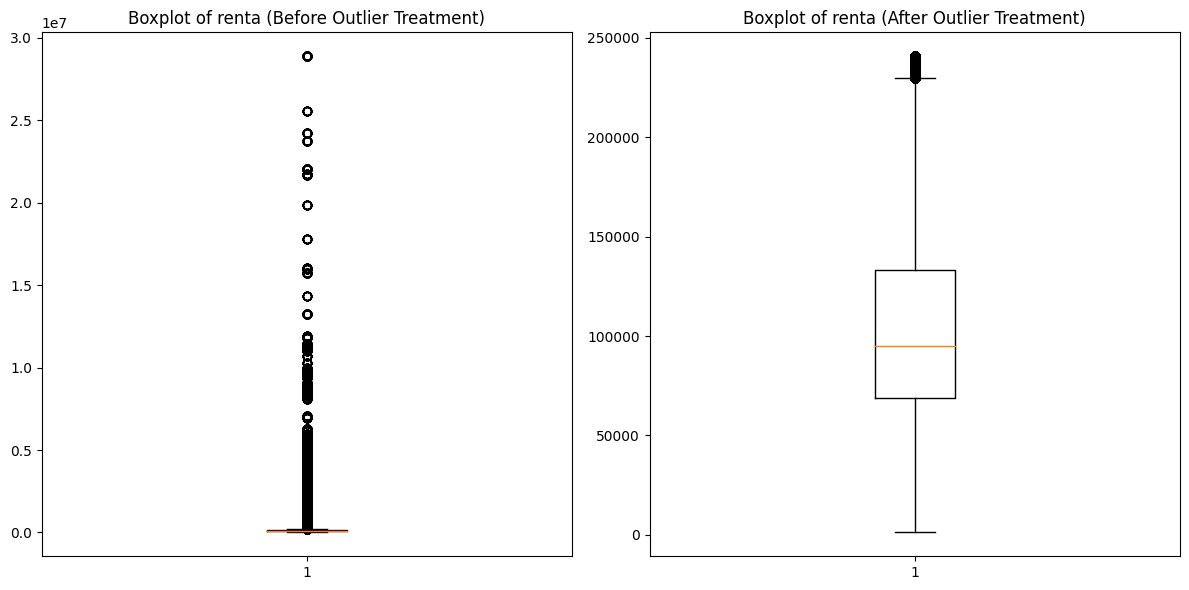

In [21]:
# Giả sử bạn đã có DataFrame df chứa dữ liệu
# Vẽ Boxplot trước khi xử lý
plt.figure(figsize=(12, 6))

# Boxplot trước khi xử lý
plt.subplot(1, 2, 1)
plt.boxplot(df['renta'])
plt.title('Boxplot of renta (Before Outlier Treatment)')

# Tính toán IQR
Q1 = df['renta'].quantile(0.25)
Q3 = df['renta'].quantile(0.75)
IQR = Q3 - Q1

# Xác định giới hạn dưới và trên
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Xử lý outlier: loại bỏ các giá trị ngoài phạm vi này
df_cleaned = df[(df['renta'] >= lower_bound) & (df['renta'] <= upper_bound)]

# Boxplot sau khi xử lý
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['renta'])
plt.title('Boxplot of renta (After Outlier Treatment)')

# Hiển thị kết quả
plt.tight_layout()
plt.show()

In [22]:
df_cleaned.to_csv('cleaned_data.csv', index=False)